In [1]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import signal
import json

Text(0, 0.5, 'Position')

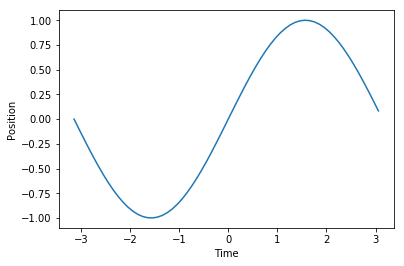

In [2]:
invertal = 0.1
n_samples = int(np.floor(2*np.pi/invertal))+1

input_range = np.arange(-np.pi, np.pi, invertal)
signal = np.sin(input_range)

plt.plot(input_range, signal)
plt.xlabel('Time')
plt.ylabel('Position')

Text(0, 0.5, 'Position')

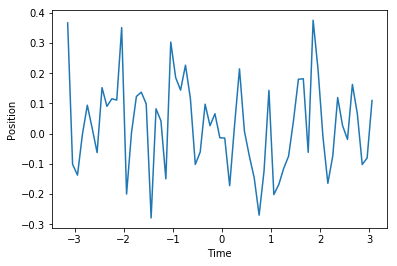

In [3]:
noise = np.random.normal(0, 0.15, n_samples)

plt.plot(input_range, noise)
plt.xlabel('Time')
plt.ylabel('Position')

Text(0, 0.5, 'Position')

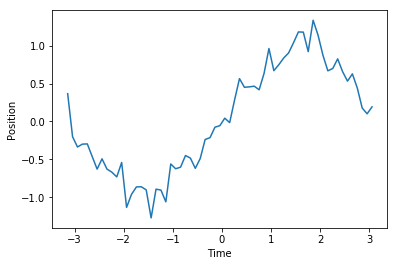

In [4]:
measurements = signal + noise

plt.plot(input_range, measurements)
plt.xlabel('Time')
plt.ylabel('Position')

Text(0, 0.5, 'position')

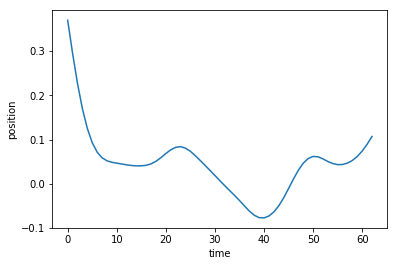

In [5]:
from scipy import signal
b, a = signal.butter(2, 0.1, btype='lowpass', analog=False)
low_passed = signal.filtfilt(b, a, noise)
plt.plot(low_passed)
plt.xlabel('time')
plt.ylabel('position')

In [6]:
!ls

Anaconda3-2018.12-Linux-x86_64.sh  dis_info.zip
compute_hosuu.html		   file
compute_hosuu.ipynb		   file.zip
cuda_10.0.130_410.48_linux.run	   Male or Female_.ipynb
dis_info


[64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 

Text(0, 0.5, 'Dis')

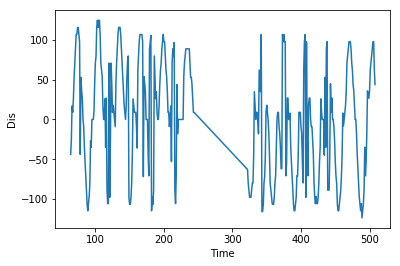

In [7]:
with open('dis_info/dis_info_04.txt') as f:
    data = json.load(f)

#pprint(data)
tdata = []
vdata = []
keylist = data.keys()
keylist = [int(x) for x in keylist]
keylist
keylist.sort()
for key in keylist:
    tdata.append(key)
    vdata.append(data[str(key)]["dis"])
    
print(keylist)
plt.plot(tdata, vdata)
plt.xlabel('Time')
plt.ylabel('Dis')

### Let’s find all peaks (local maxima) in vadata whose amplitude lies above 0.

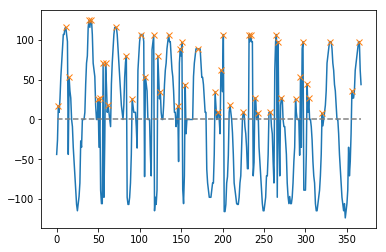

In [8]:
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
x = np.array(vdata)

peaks, _ = find_peaks(x, height=0)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

### We can select peaks below 0 with height=(None, 0) or use arrays matching vadata in size to reflect a changing condition for different parts of the signal.

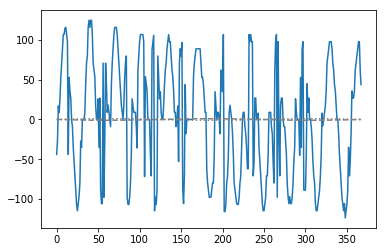

In [9]:
border = np.sin(np.linspace(0, 3 * np.pi, x.size))
peaks, _ = find_peaks(x, height=(-border, border))
plt.plot(x)
plt.plot(-border, "--", color="gray")
plt.plot(border, ":", color="gray")
plt.plot(peaks, x[peaks], "x")
plt.show()

### At least 25 samples.

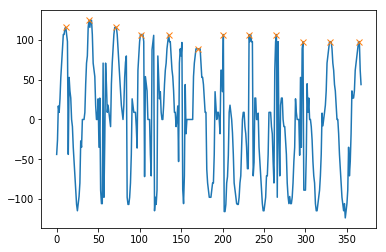

num_peaks: 12


In [10]:
peaks, _ = find_peaks(x, distance=25)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()
print("num_peaks:", len(peaks))

### ???

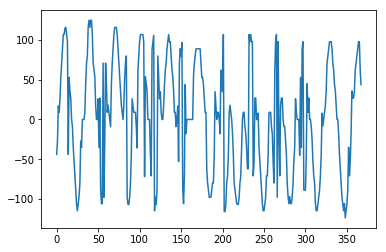

In [11]:
peaks, properties = find_peaks(x, prominence=(None, 0.6))
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()

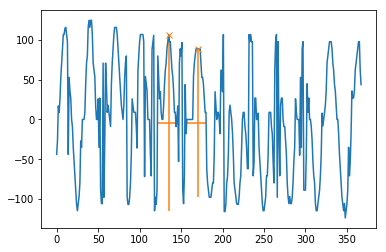

In [12]:
peaks, properties = find_peaks(x, prominence=1, width=20)
properties["prominences"], properties["widths"]

plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.vlines(x=peaks, ymin=x[peaks] - properties["prominences"], ymax = x[peaks], color = "C1")
plt.hlines(y=properties["width_heights"], xmin=properties["left_ips"], xmax=properties["right_ips"], color = "C1")
plt.show()